# Signals and Systems

## Prerequisites

In [1]:
# ! pip install -U sympy 
# ! pip install -U numpy
# ! pip install -U matplotlib

# ! sudo apt install -y cm-super
# ! sudo apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng

## Simulation and Visualization in Python

In [2]:
# HIDE/SHOW
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams['text.usetex'] = True
%matplotlib inline 

## Utilizations

In [3]:
# HIDE/SHOW
def mpl_axes_plot(axes, expr, xrange, **kwargs):
    x, start, stop = xrange
    func = sp.lambdify(x, expr)
    x = np.linspace(start, stop, 10000)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid("off")
    axes.margins(0.02, 0.02)
    return axes.plot(x, y, **kwargs)

def mpl_axes_stem(axes, expr, xrange, **kwargs):
    x, start, stop, step = xrange
    func = sp.lambdify(x, expr)
    x = np.arange(start, stop, step)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid("off")
    axes.margins(0.02, 0.02)
    return axes.stem(x, y, basefmt=" ", use_line_collection=True, **kwargs)

def mpl_axes_step(axes, expr, xrange, **kwargs):
    x, start, stop, step = xrange
    func = sp.lambdify(x, expr)
    x = np.arange(start, stop, step)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid("off")
    axes.margins(0.02, 0.02)
    return axes.step(x, y, **kwargs)

## What are Signals?

- Signals convey information. 
- Signals are represented as mathematical functions of one or more independent variables. 
- Signals are represented as mathematical functions of one dimensional variable in time.

## Basic types

- Continuous-time signals			
- Discrete-time signals
- Quantized signals 
- Digital signals?

## Continuous-time versus Discrete-time Signals

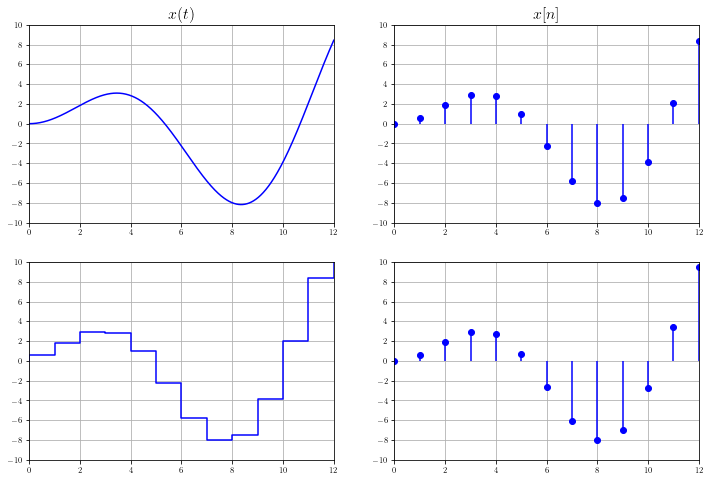

In [4]:
# HIDE/SHOW
t = sp.Symbol('t')
h = t*sp.sin(t/1.7)
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)
    
mpl_axes_plot(ax[0][0], 
    expr=h, 
    xrange=(t, -60, 60), 
    color='b')
ax[0][0].set_xlim(0, 12, 1)
ax[0][0].set_ylim(-10, 10, 1)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], 
    expr=h, 
    xrange=(t, -60, 60, 1), 
    linefmt='b', 
    markerfmt='bo')
ax[0][1].set_xlim(0, 12, 1)
ax[0][1].set_ylim(-10, 10, 1)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_step(ax[1][0], 
    expr=h, 
    xrange=(t, -60, 60, 1), 
    color='b',
)
ax[1][0].set_xlim(0, 12, 1)
ax[1][0].set_ylim(-10, 10, 1)
# ax[1][0].set_title(r'$x[n]$', fontsize=16)

mpl_axes_stem(ax[1][1], 
    expr=h.xreplace({n : round(n, 1) for n in h.atoms(sp.Number)}),
    xrange=(t, -60, 60, 1), 
    linefmt='b', 
    markerfmt='bo')
ax[1][1].set_xlim(0, 12, 1)
ax[1][1].set_ylim(-10, 10, 1)
# ax[1][1].set_title(r'$x[n]$', fontsize=16)


plt.show()

## Even and Odd Signals

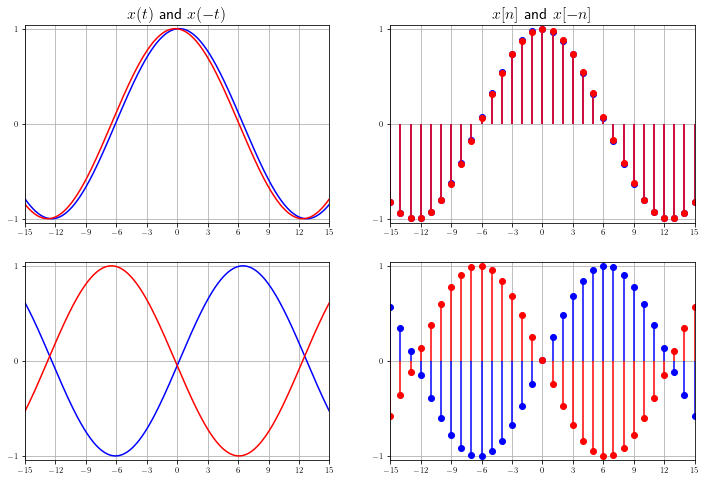

In [5]:
# HIDE/SHOW
t = sp.Symbol('t')
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

mpl_axes_plot(ax[0][0], sp.cos((t)/4-0.05), (t, -40, 40), color='b')
mpl_axes_plot(ax[0][0], sp.cos((-t)/4-0.05), (t, -40, 40), color='r')
ax[0][0].set_xlim(-15, 15, 1)
# ax[0][0].set_ylim(-10, 10, 1)
ax[0][0].set_title(r'$x(t)$ and $x(-t)$', fontsize=16)


mpl_axes_stem(ax[0][1], sp.cos((t+0.02)/4), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
mpl_axes_stem(ax[0][1], sp.cos((-t+0.02)/4), (t, -40, 40, 1), linefmt='r', markerfmt='ro')
ax[0][1].set_xlim(-15, 15, 1)
# ax[0][1].set_ylim(-10, 10, 1)
ax[0][1].set_title(r'$x[n]$ and $x[-n]$', fontsize=16)

mpl_axes_plot(ax[1][0], sp.sin((t)/4-0.05), (t, -40, 40), color='b')
mpl_axes_plot(ax[1][0], sp.sin((-t)/4-0.05), (t, -40, 40), color='r')
ax[1][0].set_xlim(-15, 15, 1)
# ax[1][0].set_ylim(-10, 10, 1)
# ax[1][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[1][1], sp.sin((t+0.02)/4), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
mpl_axes_stem(ax[1][1], sp.sin((-t+0.02)/4), (t, -40, 40, 1), linefmt='r', markerfmt='ro')
ax[1][1].set_xlim(-15, 15, 1)
# ax[1][1].set_ylim(-10, 10, 1)
# ax[1][1].set_title(r'$x[n]$', fontsize=16)

plt.show()

## Real-valued Exponential Signals

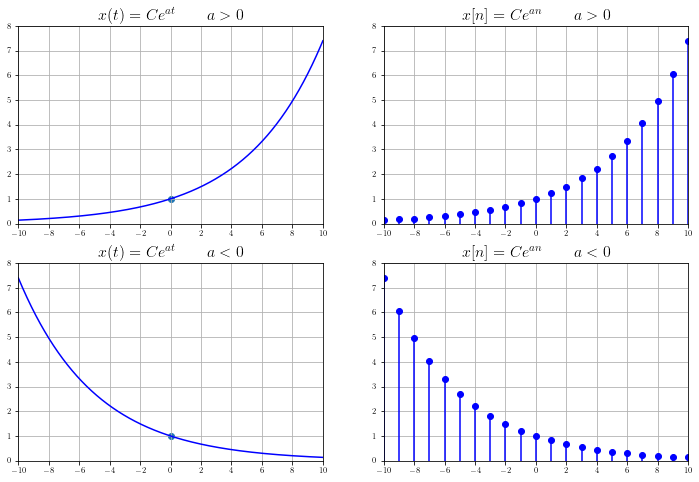

In [6]:
# HIDE/SHOW
t = sp.Symbol('t')
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

mpl_axes_plot(ax[0][0], sp.exp((t)/5), (t, -40, 40), color='b')
ax[0][0].scatter(0, 1)
ax[0][0].set_xlim(-10, 10, 1)
ax[0][0].set_ylim(0, 8, 1)
ax[0][0].set_title(r'$x(t) = Ce^{at}  \qquad  a>0$', fontsize=16)


mpl_axes_stem(ax[0][1], sp.exp((t)/5), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-10, 10, 1)
ax[0][1].set_ylim(0, 8, 1)
ax[0][1].set_title(r'$x[n] = Ce^{an}  \qquad  a>0$', fontsize=16)


mpl_axes_plot(ax[1][0], sp.exp((-t)/5), (t, -40, 40), color='b')
ax[1][0].scatter(0, 1)
ax[1][0].set_xlim(-10, 10, 1)
ax[1][0].set_ylim(0, 8, 1)
ax[1][0].set_title(r'$x(t) = Ce^{at}  \qquad  a<0$', fontsize=16)


mpl_axes_stem(ax[1][1], sp.exp((-t)/5), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-10, 10, 1)
ax[1][1].set_ylim(0, 8, 1)
ax[1][1].set_title(r'$x[n] = Ce^{an}  \qquad  a<0$', fontsize=16)

plt.show()

## Complex Exponential Signals

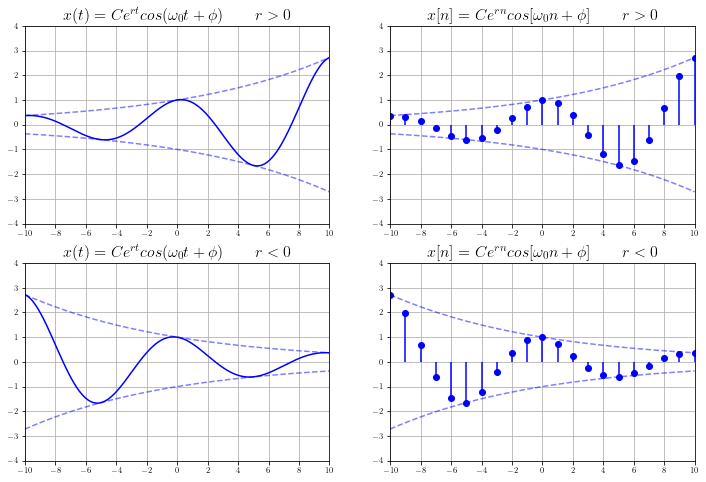

In [7]:
# HIDE/SHOW
t = sp.Symbol('t')
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

mpl_axes_plot(ax[0][0], sp.exp((t)/10)*sp.cos(2*np.pi*t/10), (t, -40, 40), color='b')
mpl_axes_plot(ax[0][0], sp.exp((t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
mpl_axes_plot(ax[0][0], -sp.exp((t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
ax[0][0].set_xlim(-10, 10, 1)
ax[0][0].set_ylim(-4, 4, 1)
ax[0][0].set_title(r'$x(t) = Ce^{rt}cos(\omega_0t+\phi) \qquad r>0$', fontsize=16)


mpl_axes_stem(ax[0][1], sp.exp((t)/10)*sp.cos(2*np.pi*t/10), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
mpl_axes_plot(ax[0][1], sp.exp((t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
mpl_axes_plot(ax[0][1], -sp.exp((t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
ax[0][1].set_xlim(-10, 10, 1)
ax[0][1].set_ylim(-4, 4, 1)
ax[0][1].set_title(r'$x[n] = Ce^{rn}cos[\omega_0n+\phi] \qquad r>0$', fontsize=16)


mpl_axes_plot(ax[1][0], sp.exp((-t)/10)*sp.cos(2*np.pi*t/10), (t, -40, 40), color='b')
mpl_axes_plot(ax[1][0], sp.exp((-t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
mpl_axes_plot(ax[1][0], -sp.exp((-t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
ax[1][0].set_xlim(-10, 10, 1)
ax[1][0].set_ylim(-4, 4, 1)
ax[1][0].set_title(r'$x(t) = Ce^{rt}cos(\omega_0t+\phi) \qquad r<0$', fontsize=16)


mpl_axes_stem(ax[1][1], sp.exp((-t)/10)*sp.cos(2*np.pi*t/10), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
mpl_axes_plot(ax[1][1], sp.exp((-t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
mpl_axes_plot(ax[1][1], -sp.exp((-t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
ax[1][1].set_xlim(-10, 10, 1)
ax[1][1].set_ylim(-4, 4, 1)
ax[1][1].set_title(r'$x[n] = Ce^{rn}cos[\omega_0n+\phi] \qquad r<0$', fontsize=16)

plt.show()